In [1]:
import re

import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
with open('../../data/clean/misconduct_indicators_train.pkl', 'rb') as train_file:
    misconduct = pickle.load(train_file)

In [5]:
indicated_cols = [
    'misconduct_type',
    'court_type',
    'enforcement_agency',
    'contracting_party'
]

indicator_features = [
    col for col in misconduct.columns
    if re.search(f'^({"|".join(indicated_cols)})_', col)
]

misconduct = misconduct[[*indicator_features, 'total_penalties']]
misconduct = misconduct[~ pd.isnull(misconduct.total_penalties)]

In [27]:
train, test = train_test_split(misconduct, test_size=0.2, random_state=13)

lr = LinearRegression()
lr.fit(
    train.loc[:, indicator_features],
    train['total_penalties']
)
lr.score(
    test.loc[:, indicator_features],
    test['total_penalties']
)

misconduct.shape

(1784, 107)

In [6]:
def cv_mean(model):
    return np.mean(
        cross_val_score(
            model,
            misconduct.loc[:, indicator_features],
            misconduct['total_penalties'],
            cv=3 # limited by class imbalance
        )
    )

In [7]:
model_cv_score = {}

In [14]:
model_cv_score['logistic_regression'] = cv_mean(
    LinearRegression()
)

NEXT: select features with random forest weighs (Chelan)

-1.3037103347599972e+23

In [9]:
# model_cv_score['svc_linear'] = cv_mean(
#     SVC(kernel='linear')
# )

In [10]:
# model_cv_score['lone_decision_tree'] = cv_mean(
#     DecisionTreeClassifier()
# )

In [11]:
# model_cv_score['random_forest'] = cv_mean(
#     RandomForestClassifier(
#         n_estimators=76, # entropy more uniform, gini needed at least ~60
#         max_depth=16, # too high? but cross avalidation works
#         criterion='entropy', # mot much difference
#         random_state=62
#     )
# )

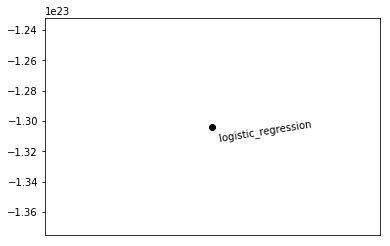

In [13]:
names = list(model_cv_score.keys())
scores = list(model_cv_score.values())

plt.scatter(
    names,
    scores,
    color='#000000'
)

plt.xticks([], rotation='vertical')
for ind, name in enumerate(names):
    plt.annotate(f'  {name}', (names[ind], scores[ind]), rotation=9)
